In [5]:
from quantrocket.license import set_license
set_license("0ef434eb-de15-11ee-8e3c-47c3c11eda31")

{'licensekey': '0ef4........da31', 'software_license': {}}

In [6]:
from quantrocket.history import create_usstock_db
create_usstock_db("usstock-free-1d", bar_size="1 day", free=True)

HTTPError: ('400 Client Error: BAD REQUEST for url: http://houston/history/databases/usstock-free-1d?vendor=usstock&bar_size=1+day&free=True', {'status': 'error', 'msg': 'quantrocket.v2.history.usstock-free-1d.sqlite already exists'})

In [7]:
from quantrocket.history import collect_history
collect_history("usstock-free-1d")

{'status': 'the historical data will be collected asynchronously'}

In [8]:
from quantrocket.master import get_securities
# by specifying sec_types='STK', we exclude ETFs, which are present in the sample data 
securities = get_securities(vendors="usstock", sec_types="STK")
securities.head()

,Symbol,Exchange,Country,Currency,SecType,Etf,Timezone,Name,PriceMagnifier,Multiplier,Delisted,DateDelisted,LastTradeDate,RolloverDate
Sid,,,,,,,,,,,,,,
FIBBG000B9XRY4,AAPL,XNAS,US,USD,STK,False,America/New_York,APPLE INC,1,1,False,NaT,NaT,NaT
FIBBG000BFWKC0,MON,XNYS,US,USD,STK,False,America/New_York,MONSANTO CO,1,1,True,2018-06-06,NaT,NaT
FIBBG000BKZB36,HD,XNYS,US,USD,STK,False,America/New_York,HOME DEPOT INC,1,1,False,NaT,NaT,NaT
FIBBG000BMHYD1,JNJ,XNYS,US,USD,STK,False,America/New_York,JOHNSON & JOHNSON,1,1,False,NaT,NaT,NaT
FIBBG000BPH459,MSFT,XNAS,US,USD,STK,False,America/New_York,MICROSOFT CORP,1,1,False,NaT,NaT,NaT


In [9]:
from quantrocket.master import create_universe
create_universe("usstock-free", sids=securities.index.tolist())

{'code': 'usstock-free', 'provided': 8, 'inserted': 8, 'total_after_insert': 8}

In [10]:
filtered_securities = securities[securities.Delisted==False]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False
FIBBG000BKZB36,HD,XNYS,HOME DEPOT INC,False
FIBBG000BMHYD1,JNJ,XNYS,JOHNSON & JOHNSON,False
FIBBG000BPH459,MSFT,XNAS,MICROSOFT CORP,False
FIBBG000GZQ728,XOM,XNYS,EXXON MOBIL CORP,False


In [11]:
filtered_securities = securities[securities.Symbol=="AAPL"]
# also limit the number of columns for readability
filtered_securities = filtered_securities[["Symbol", "Exchange", "Name", "Delisted"]]
filtered_securities.head()

,Symbol,Exchange,Name,Delisted
Sid,,,,
FIBBG000B9XRY4,AAPL,XNAS,APPLE INC,False


In [12]:
create_universe("usstock-free-active", sids=filtered_securities.index.tolist())

{'code': 'usstock-free-active',
 'provided': 1,
 'inserted': 1,
 'total_after_insert': 1}

In [13]:
from quantrocket import get_prices
prices = get_prices("usstock-free-1d", universes="usstock-free-active", start_date="2023-01-01",end_date="2023-12-31", fields=["Close"])
prices.head()

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616

In [14]:
prices

Sid               FIBBG000B9XRY4
Field Date                      
Close 2023-01-03        124.2163
      2023-01-04        125.4975
      2023-01-05        124.1666
      2023-01-06        128.7352
      2023-01-09        129.2616
...                          ...
      2023-12-22        193.3533
      2023-12-26        192.8040
      2023-12-27        192.9038
      2023-12-28        193.3333
      2023-12-29        192.2846

[250 rows x 1 columns]

In [16]:
prices.to_csv("data.csv")

In [17]:
import pandas as pd


In [18]:
dataframe=pd.read_csv('data.csv')

In [22]:
columns = dataframe.columns.tolist()
columns[2] = "close_price"
dataframe.columns = columns
dataframe.to_csv('data.csv', index=False)

In [31]:

dataframe['return_price'] = dataframe['close_price'].pct_change()


In [32]:
dataframe.head()

,Field,Date,close_price,return_price
0,Close,2023-01-03,124.2163,NaN
1,Close,2023-01-04,125.4975,0.010314
2,Close,2023-01-05,124.1666,-0.010605
3,Close,2023-01-06,128.7352,0.036794
4,Close,2023-01-09,129.2616,0.004089


In [39]:
dataframe['return_price'] = dataframe['close_price'].pct_change()

In [40]:
dataframe.head()

,Field,Date,close_price,return_price,state
0,Close,2023-01-03,124.2163,NaN,-1
1,Close,2023-01-04,125.4975,0.010314,0
2,Close,2023-01-05,124.1666,-0.010605,0
3,Close,2023-01-06,128.7352,0.036794,0
4,Close,2023-01-09,129.2616,0.004089,0


In [41]:
dataframe['return_price']=dataframe['return_price'].bfill()

In [49]:
def classify(rval):
    if rval>=0.01:
        return 1
    elif rval>-0.01:
        return 0
    else:
        return -1
dataframe['state']=dataframe['return_price'].apply(classify)

In [50]:
dataframe


,Field,Date,close_price,return_price,state
0,Close,2023-01-03,124.2163,0.010314,1
1,Close,2023-01-04,125.4975,0.010314,1
2,Close,2023-01-05,124.1666,-0.010605,-1
3,Close,2023-01-06,128.7352,0.036794,1
4,Close,2023-01-09,129.2616,0.004089,0
...,...,...,...,...,...
245,Close,2023-12-22,193.3533,-0.005547,0
246,Close,2023-12-26,192.8040,-0.002841,0
247,Close,2023-12-27,192.9038,0.000518,0
248,Close,2023-12-28,193.3333,0.002226,0


In [51]:
matching_rows = dataframe[dataframe['state'] == -1]
matching_rows

,Field,Date,close_price,return_price,state
2,Close,2023-01-05,124.1666,-0.010605,-1
18,Close,2023-01-30,142.0239,-0.020078,-1
23,Close,2023-02-06,150.6943,-0.017929,-1
25,Close,2023-02-08,150.8830,-0.017653,-1
31,Close,2023-02-16,152.8939,-0.010429,-1
33,Close,2023-02-21,147.6917,-0.026680,-1
36,Close,2023-02-24,145.9311,-0.018005,-1
39,Close,2023-03-01,144.5385,-0.014246,-1
43,Close,2023-03-07,150.7951,-0.014497,-1
45,Close,2023-03-09,149.7905,-0.014915,-1


In [52]:
len(matching_rows)

35

In [53]:
matching_rows = dataframe[dataframe['state'] == 1]
matching_rows

,Field,Date,close_price,return_price,state
0,Close,2023-01-03,124.2163,0.010314,1
1,Close,2023-01-04,125.4975,0.010314,1
3,Close,2023-01-06,128.7352,0.036794,1
6,Close,2023-01-11,132.5788,0.021112,1
8,Close,2023-01-13,133.8402,0.010119,1
12,Close,2023-01-20,136.9289,0.019220,1
13,Close,2023-01-23,140.1468,0.023501,1
14,Close,2023-01-24,141.5571,0.010063,1
16,Close,2023-01-26,142.9774,0.014804,1
17,Close,2023-01-27,144.9339,0.013684,1


In [54]:
len(matching_rows)

57

In [55]:
matching_rows = dataframe[dataframe['state'] == 0]
matching_rows
len(matching_rows)

158

In [56]:
from collections import defaultdict

# Initialize transition distribution dictionary
transition_distribution = defaultdict(lambda: defaultdict(int))

# Calculate transition distribution
for i in range(1, len(dataframe)):
    previous_state = dataframe['state'][i - 1]
    current_state = dataframe['state'][i]
    transition_distribution[previous_state][current_state] += 1

# Normalize transition distribution
for previous_state in transition_distribution:
    total_transitions = sum(transition_distribution[previous_state].values())
    for current_state in transition_distribution[previous_state]:
        transition_distribution[previous_state][current_state] /= total_transitions

print(transition_distribution)


defaultdict(<function <lambda> at 0x7f1e96e474c0>, {1: defaultdict(<class 'int'>, {1: 0.21052631578947367, -1: 0.12280701754385964, 0: 0.6666666666666666}), -1: defaultdict(<class 'int'>, {1: 0.11428571428571428, 0: 0.7428571428571429, -1: 0.14285714285714285}), 0: defaultdict(<class 'int'>, {0: 0.5987261146496815, 1: 0.25477707006369427, -1: 0.1464968152866242})})


In [72]:
# Initialize portfolio value and buy order count
portfolio_value = 0
buy_order_count = 0
optimal_buy_indices = []
optimal_buy_dates=[]
# Iterate through the data to make decisions
for i in range(1, len(dataframe)):
    previous_state = dataframe['state'][i - 1]
    current_state = dataframe['state'][i]
    
    # Check if a buy order should be placed based on the state transition
    if current_state == 1 and previous_state == 0:
        portfolio_value += 1
        buy_order_count += 1
        optimal_buy_indices.append(i)  # Record the index where buy order is placed
        optimal_buy_dates.append(dataframe['Date'][i]) # Record the date when the buy order is to be placed
    elif current_state == -1 and previous_state == 0:
        portfolio_value -= 1
    
    # Update portfolio value for all other cases
    # Portfolio value remains unchanged when no buy order is placed
    # Portfolio value changes according to the state transition
    # (increase by 1 for Bull state, decrease by 1 for Bear state)
    portfolio_value = max(0, portfolio_value)  # Portfolio value cannot be negative
    dataframe.at[i, 'portfolio_value'] = portfolio_value

# Print the final portfolio value and the optimal buy indices
print("Final Portfolio Value:", portfolio_value)
print("Optimal Buy Indices:", optimal_buy_indices)
optimal_buy_dates.sort()
for i in optimal_buy_dates:
    print("Optimal buying dates:",i)
print(len(optimal_buy_dates))

Final Portfolio Value: 17
Optimal Buy Indices: [6, 8, 12, 16, 21, 28, 30, 41, 50, 52, 59, 61, 69, 79, 85, 88, 94, 100, 103, 108, 110, 113, 117, 120, 123, 133, 142, 160, 164, 177, 187, 191, 207, 209, 212, 216, 218, 232, 234, 238]
Optimal buying dates: 2023-01-11
Optimal buying dates: 2023-01-13
Optimal buying dates: 2023-01-20
Optimal buying dates: 2023-01-26
Optimal buying dates: 2023-02-02
Optimal buying dates: 2023-02-13
Optimal buying dates: 2023-02-15
Optimal buying dates: 2023-03-03
Optimal buying dates: 2023-03-16
Optimal buying dates: 2023-03-20
Optimal buying dates: 2023-03-29
Optimal buying dates: 2023-03-31
Optimal buying dates: 2023-04-13
Optimal buying dates: 2023-04-27
Optimal buying dates: 2023-05-05
Optimal buying dates: 2023-05-10
Optimal buying dates: 2023-05-18
Optimal buying dates: 2023-05-26
Optimal buying dates: 2023-06-01
Optimal buying dates: 2023-06-08
Optimal buying dates: 2023-06-12
Optimal buying dates: 2023-06-15
Optimal buying dates: 2023-06-22
Optimal buyi

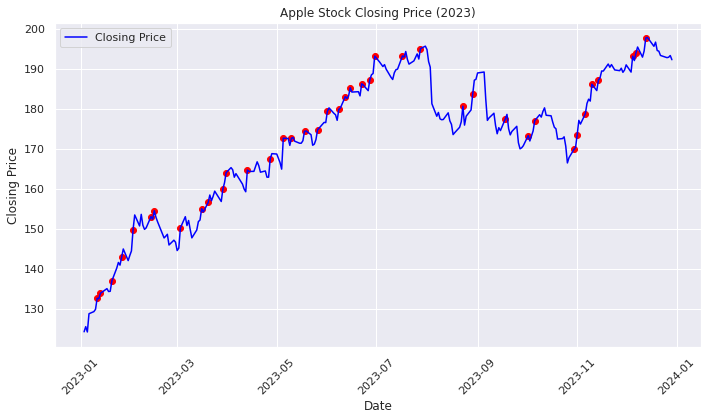

In [81]:

import matplotlib.pyplot as plt
dataframe['Date'] = pd.to_datetime(dataframe['Date'])

# Plotting the time series
plt.figure(figsize=(10, 6))
plt.plot(dataframe['Date'], dataframe['close_price'], color='blue', label='Closing Price')
plt.title('Apple Stock Closing Price (2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
for date in optimal_buy_dates:
    if date in dataframe['Date'].astype(str).values:
        index = dataframe[dataframe['Date'].astype(str) == date].index[0]
        plt.scatter(dataframe['Date'][index], dataframe['close_price'][index], color='red', label='Optimal Buy Date')
plt.savefig('apple_stock_closing_price_2023.png')

plt.tight_layout()
plt.show()


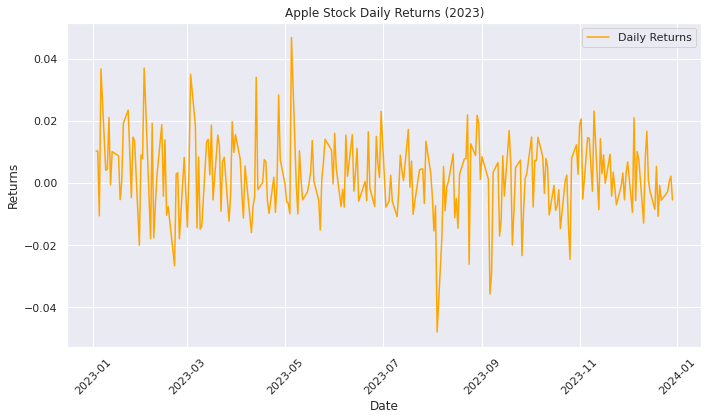

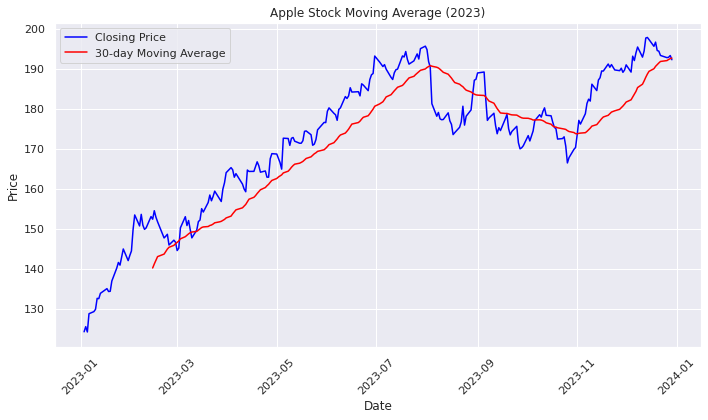

In [82]:

# Daily Returns Plot
plt.figure(figsize=(10, 6))
plt.plot(dataframe['Date'], dataframe['return_price'], color='orange', label='Daily Returns')
plt.title('Apple Stock Daily Returns (2023)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('apple_stock_closing_price_2023_dailyretplot.png')
plt.tight_layout()
plt.show()

# Moving Average Plot
window_size = 30  # Adjust the window size as needed
rolling_mean = dataframe['close_price'].rolling(window=window_size).mean()
plt.figure(figsize=(10, 6))
plt.plot(dataframe['Date'], dataframe['close_price'], color='blue', label='Closing Price')
plt.plot(dataframe['Date'], rolling_mean, color='red', label=f'{window_size}-day Moving Average')
plt.title('Apple Stock Moving Average (2023)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.savefig('apple_stock_moving_average.png')
plt.tight_layout()
plt.show()





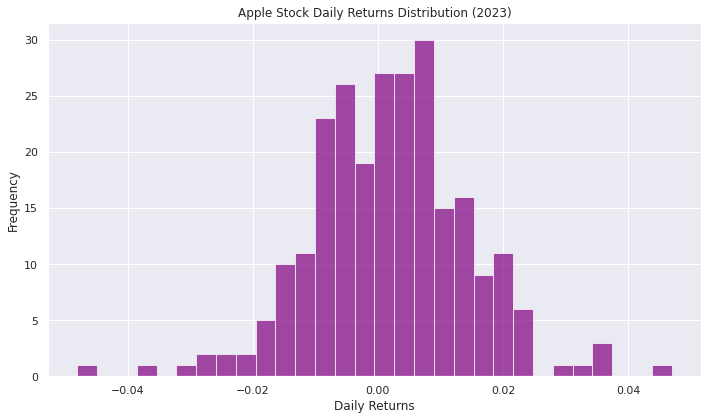

In [83]:
# Histogram of Daily Returns
plt.figure(figsize=(10, 6))
plt.hist(dataframe['return_price'].dropna(), bins=30, color='purple', alpha=0.7)
plt.title('Apple Stock Daily Returns Distribution (2023)')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.savefig('histogram_apple_return_price.png')
plt.tight_layout()
plt.show()


In [88]:
with open('output.txt', 'w') as file:
    file.write(f"Final Portfolio Value: {portfolio_value}\n")
    file.write(f"Total Buy Orders Placed: {buy_order_count}\n")
    file.write(f"Optimal Buy Indices: {optimal_buy_indices}\n")
    file.write("Optimal Buying dates :\n")
    for index in optimal_buy_dates:
        file.write(f" {index}\n")

#NOTE :- the algorithm implemented is as it is given in the question ... NO assumptions were made